# List 1 Computational Physics

First we will import the necessary libraries for this lesson

In [140]:
import numpy as np
from cmath import exp, pi
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.ticker import ScalarFormatter

## Problem 1 - Calculate the Discret Fourier Transform DFT

In [8]:
def dft(y):
    N = len(y)
    c = zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

### **Alternative a)** First we will calculate our first function

In [10]:
def square(point, L):
    if (point <= L/2):
        return 2
    else:
        return -2

In [69]:
a = 0
L = 10
N = 1000
h = (L-a)/N

tpoints = arange(a, L, h)
y = []

for k in tpoints:
    y.append(square(k, L))

Our square function and its coefficient amplitudes looks like this

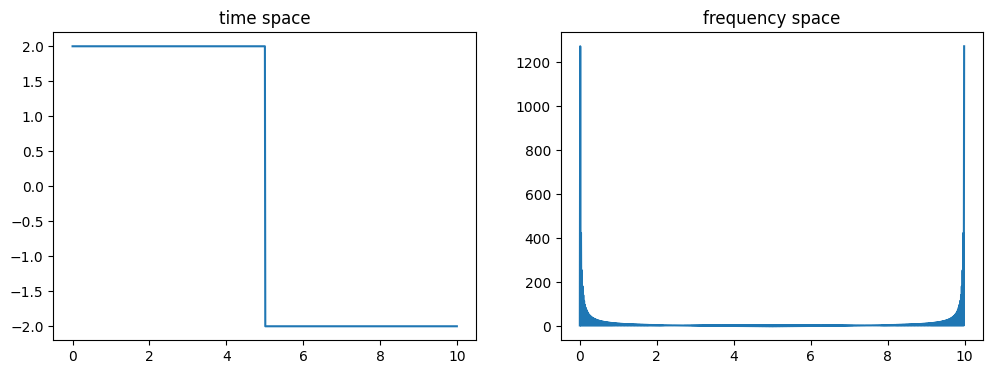

In [80]:
fig, axsa = subplots(1, 2, figsize=(12, 4))

axsa[0].plot(tpoints, y)
axsa[0].set_title('time space')

axsa[1].plot(tpoints, abs(cka))
axsa[1].set_title('frequency space')

plt.show()

### **Alternative b)** Now for the next function we have

In [17]:
def sinsin10(point, L, N):
    return sin(pi*point/N)*sin(10*pi*point/N)

In [18]:
a2, b2 = 0, 1000
N2 = 1000
h2 = (b2-a2)/N2

t2points = arange(a, b2, h2)
y2 = []

for k in t2points:
    y2.append(sinsin10(k, b2, N2))

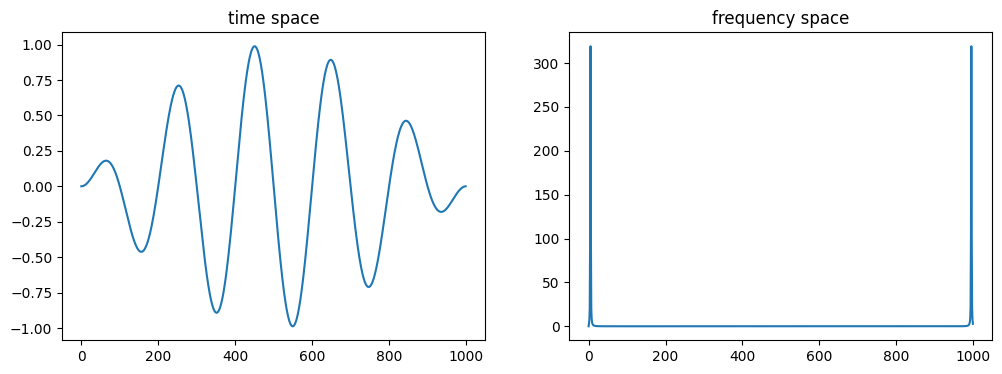

In [84]:
fig, axsb = subplots(1, 2, figsize=(12, 4))

axsb[0].plot(t2points, y2)
axsb[0].set_title('time space')

axsb[1].plot(t2points, abs(ckb))
axsb[1].set_title('frequency space')

plt.show()

## Problem 2 - Detecting the periodicity of a signal

### **Alternative a)** We will estimate of the cycle length of the flutuations in months

In [24]:
arr = loadtxt('sunspots.txt', delimiter='\t')
arr = arr.T

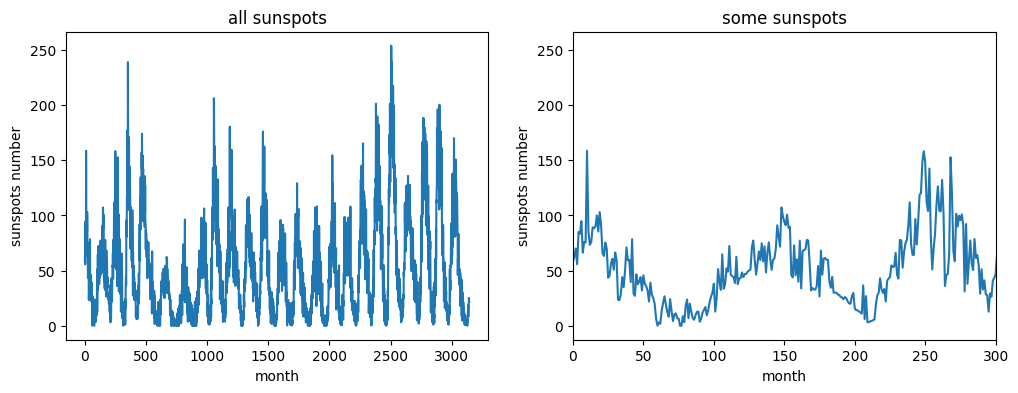

In [25]:
month, fluct = arr[0], arr[1]

fig, axs = subplots(1, 2, figsize=(12, 4))

axs[0].plot(month, fluct)
axs[0].set_title('all sunspots')
axs[0].set_xlabel('month')
axs[0].set_ylabel('sunspots number')

axs[1].plot(month, fluct)
axs[1].set_title('some sunspots')
axs[1].set_xlim(0, 300)
axs[1].set_xlabel('month')
axs[1].set_ylabel('sunspots number')

plt.show()

we can see in the second image that we have approximately 2.5 fluctuations in 300 months, this mean that

In [27]:
lengh_cycle = 300/2.5
lengh_cycle

120.0

### **Alternative b)** Fourier transform for this sunspots

In [29]:
cks = dft(fluct)

In [30]:
cks

array([163198.7           +0.j        ,  14414.58267477+15191.16504726j,
        -1054.13559853+16829.90354705j, ...,
        -9578.41104515+16623.84776116j,  -1054.13559847-16829.90354706j,
        14414.58267484-15191.16504724j])

In [31]:
cks2 = cks.copy()

for i in range(len(cks2)):
    if i==0:
        cks2[i] = 0
    else:
        cks2[i] = abs(cks2[i])**2

In [32]:
month_range = len(month)
month_range

3143

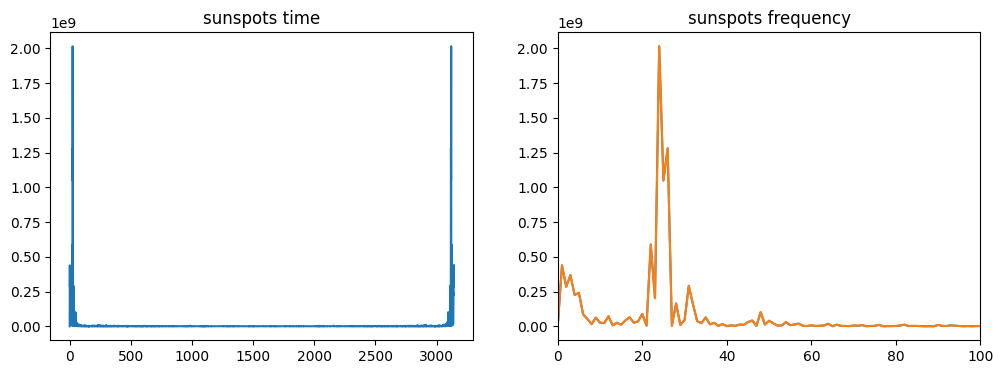

In [220]:
fig, axsb = subplots(1, 2, figsize=(12, 4))

axsb[0].plot(cks2)
axsb[0].set_title('sunspots time')

axsb[1].plot(cks2)
axsb[1].set_title('sunspots frequency')
axsb[1].set_xlim(0, 100)

plt.plot(cks2)
plt.show()

### **Alternative c)** Find the frequency and its respective period

seeing the figure, we note that the max value is approximately between 0 and 100 month

(dont take in account the final result because the coefficients are mirrored), so we need find the max value in this interval 

In [37]:
max_value = 0
month_max_value = 0

for i in range(100):
    if cks2[i] > max_value:
        max_value = cks2[i]
        month_max_value = i

now we find the maximum frequence and its respective month

In [39]:
print(f'max value = {real(max_value):.2e} and its respective month = {month_max_value}')

max value = 2.01e+09 and its respective month = 24


we can calculate the frequency in Hz, using the transform units from month to second multiplying by "24 x 30 x 3600"

In [41]:
freq = month_max_value/ (len(month)*24*30*3600)
print(f'maximum frequence = {freq:.2e} Hz')

maximum frequence = 2.95e-09 Hz


In [42]:
p = len(month)/month_max_value
print(f'period = {p:.4f} day')

period = 130.9583 day


## Problem 3 - Fourier Transform of the musical instruments

### **Alternative a)** learn arquive and calculate the dft 

In [174]:
piano = loadtxt('piano.txt')
trumpet = loadtxt('trumpet.txt')

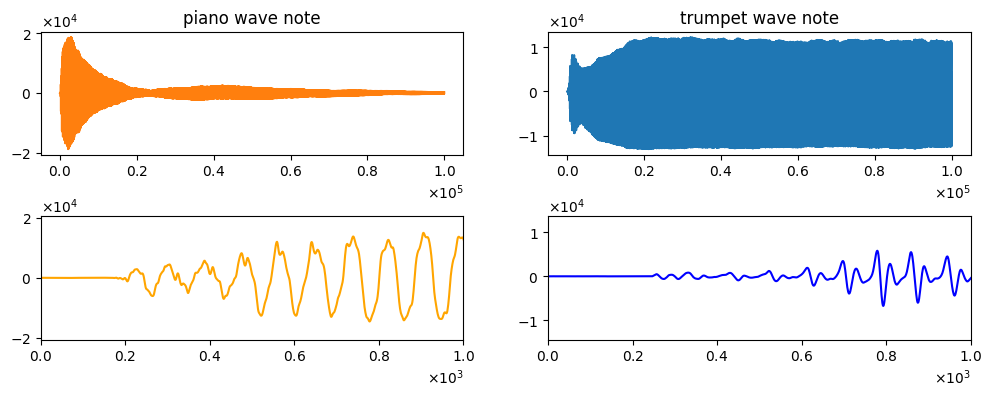

In [218]:
fig, axs = subplots(2, 2, figsize = (12, 4))

for i in range(2):
    for j in range(2):
        axs[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Eixo x
        axs[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Eixo y
        axs[i, j].ticklabel_format(style='sci', axis='both', scilimits=(0, 0))

axs[0, 0].plot(piano, c='tab:orange')
axs[0, 0].set_title('piano wave note')

axs[1, 0].plot(piano, c='orange')
axs[1, 0].set_xlim(0, 1000)

axs[0, 1].plot(trumpet)
axs[0, 1].set_title('trumpet wave note')

axs[1, 1].plot(trumpet, c='blue')
axs[1, 1].set_xlim(0, 1000)

plt.subplots_adjust(hspace=0.5)  # Espaçamento vertical aumentado
plt.show()

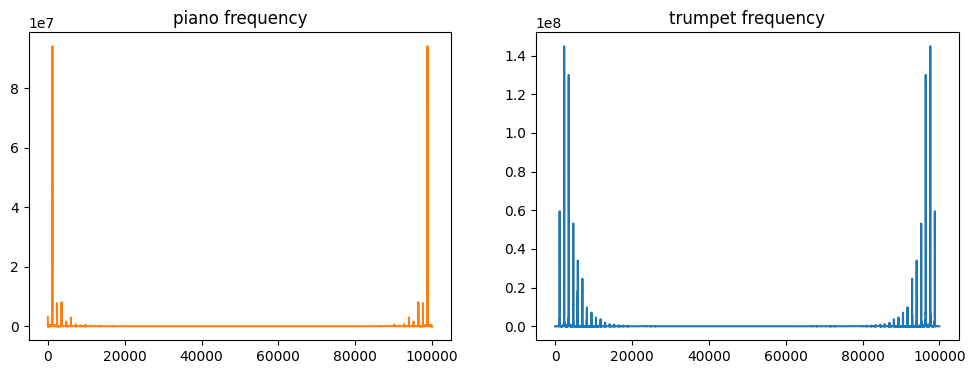

In [184]:
pian = abs(fft(piano))
trump = abs(fft(trumpet))

fig, axs3 = subplots(1, 2, figsize=(12, 4))

axs3[0].plot(pian, c='tab:orange')
axs3[0].set_title('piano frequency')

axs3[1].plot(trump)
axs3[1].set_title('trumpet frequency')

plt.show()

### **Alternative b)** calculate the note used by this musical instruments

$$ \frac{44100 \hspace{0.3cm} notes}{1 \hspace{0.3cm} sec} = \frac{x \hspace{0.3cm}}{10000 \hspace{0.3cm} sec}$$

## Problem 4 - Fourier filtering and smoothing